In [48]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Comparison of UL/DL when using different TDD Splits at 6 Nodes, 5G Only
* UL and DL times wont be normalized to num-examples as they are IV's

In [89]:
# Load the dataset and drop all unrelated cols
node_dataset_path = Path('data/nodes/6nodes.csv')
node_dataset_df = pd.read_csv(node_dataset_path)
node_dataset_df = node_dataset_df[(node_dataset_df['bandwidth'] == '100 MHz')]
node_dataset_df.drop(columns=['nodes', 'train_loss', 'eval_loss', 'eval_acc', 'downlink_latency_x', 'downlink_latency_y', 'uplink_latency_x', 'uplink_latency_y', 'bandwidth', 'network'])

,run_id,timestamp,cid,tdd,rank,distribution,train_time,eval_time,num-examples,num-eval-examples,round,downlink_latency,uplink_latency,start_time,exec_time
16769,11884580922280689213,1.762624e+09,4,7-2,1x1,iid,5.807152,0.759145,3076.0,770.0,1.0,1.180428,5.529445,1.762624e+09,6368.88
16770,11884580922280689213,1.762624e+09,3,7-2,1x1,iid,13.515154,1.553067,7196.0,1800.0,1.0,1.101360,2.340411,1.762624e+09,6368.88
16771,11884580922280689213,1.762624e+09,2,7-2,1x1,iid,12.426906,1.408551,6614.0,1654.0,1.0,1.134060,2.720034,1.762624e+09,6368.88
16772,11884580922280689213,1.762624e+09,5,7-2,1x1,iid,9.044783,1.067097,4814.0,1204.0,1.0,1.368811,2.128179,1.762624e+09,6368.88
16773,11884580922280689213,1.762624e+09,6,7-2,1x1,iid,15.071033,1.660427,8033.0,2009.0,1.0,1.025614,2.030197,1.762624e+09,6368.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64494,6590760597879086124,1.762651e+09,5,2-7,2x2,iid,9.005320,0.890158,4814.0,1204.0,200.0,1.741890,0.974518,1.762645e+09,6502.98
64495,6590760597879086124,1.762651e+09,2,2-7,2x2,iid,12.445903,1.208088,6614.0,1654.0,200.0,1.432667,1.018186,1.762645e+09,6502.98
64496,6590760597879086124,1.762651e+09,3,2-7,2x2,iid,13.450996,1.297512,7196.0,1800.0,200.0,1.662747,1.181152,1.762645e+09,6502.98
64497,6590760597879086124,1.762651e+09,6,2-7,2x2,iid,15.145646,1.464657,8033.0,2009.0,200.0,1.303049,1.141018,1.762645e+09,6502.98


In [90]:
# Get the number of included experiments
print(f'Including {len(node_dataset_df['run_id'].unique())} experiments')

Including 14 experiments


In [91]:
print(node_dataset_df.head())

                     run_id     timestamp nodes  cid bandwidth  tdd rank  \
16769  11884580922280689213  1.762624e+09    6N    4   100 MHz  7-2  1x1   
16770  11884580922280689213  1.762624e+09    6N    3   100 MHz  7-2  1x1   
16771  11884580922280689213  1.762624e+09    6N    2   100 MHz  7-2  1x1   
16772  11884580922280689213  1.762624e+09    6N    5   100 MHz  7-2  1x1   
16773  11884580922280689213  1.762624e+09    6N    6   100 MHz  7-2  1x1   

      network distribution  train_loss  ...  num-eval-examples  round  \
16769    wwan          iid    2.102320  ...              770.0    1.0   
16770    wwan          iid    2.267772  ...             1800.0    1.0   
16771    wwan          iid    2.154928  ...             1654.0    1.0   
16772    wwan          iid    2.233182  ...             1204.0    1.0   
16773    wwan          iid    2.184014  ...             2009.0    1.0   

       downlink_latency  uplink_latency    start_time  exec_time  \
16769          1.180428        5.529

In [92]:
node_dataset_df['tdd'] = node_dataset_df['tdd'].str.replace('-', ':')
print(node_dataset_df['tdd'].unique())
tdd_order = ['2:7', '2:2', '5:4', '3:1', '7:2']
node_dataset_df['tdd'] = pd.Categorical(node_dataset_df['tdd'], categories=tdd_order, ordered=True)

<StringArray>
['7:2', '5:4', '2:2', '3:1', '2:7']
Length: 5, dtype: str


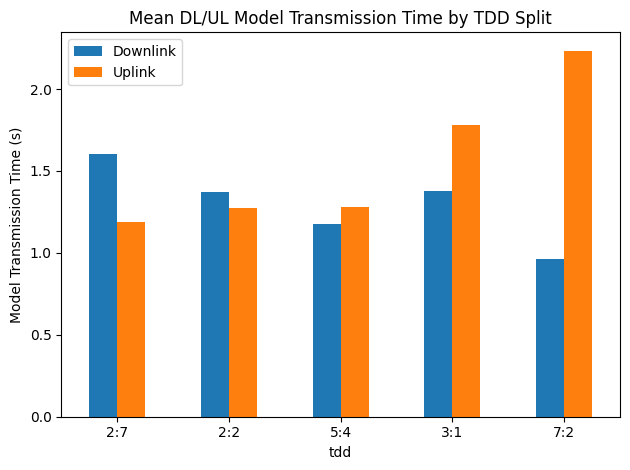

In [93]:
grouped = node_dataset_df.groupby('tdd')[['downlink_latency','uplink_latency']].median()
grouped.plot(kind='bar')
plt.ylabel('Model Transmission Time (s)')
plt.title('Mean DL/UL Model Transmission Time by TDD Split')
plt.xticks(rotation=0)
plt.legend(['Downlink','Uplink'])
plt.tight_layout()

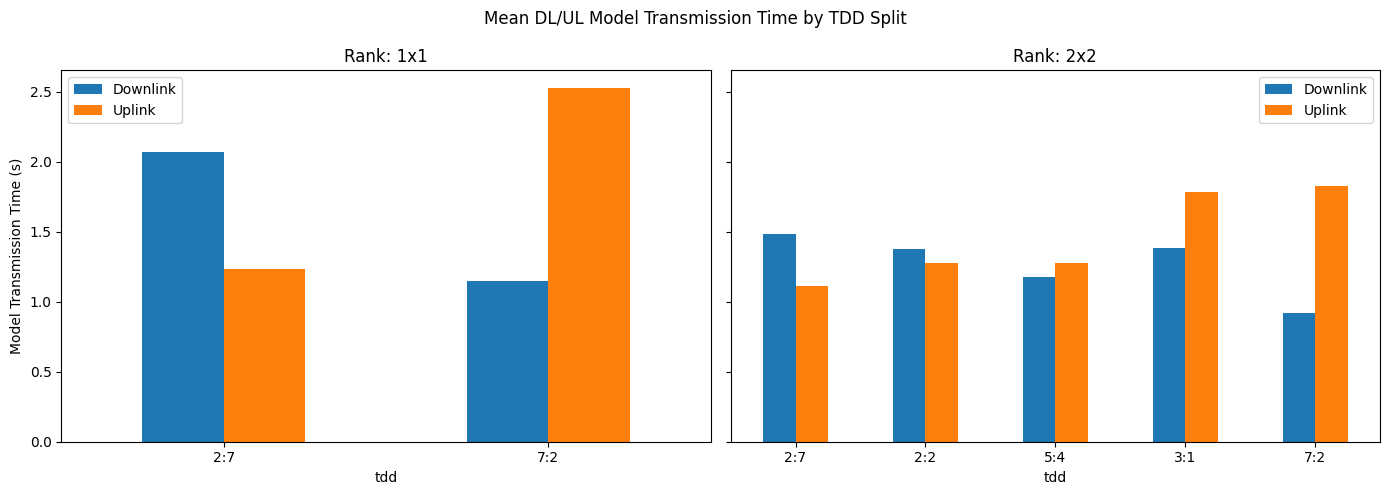

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for ax, (rank, grp) in zip(axes, node_dataset_df.groupby('rank')):
    g = grp.groupby('tdd')[['downlink_latency','uplink_latency']].median()
    g.plot(kind='bar', ax=ax)
    ax.set_title(f'Rank: {rank}')
    ax.set_ylabel('Model Transmission Time (s)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(['Downlink', 'Uplink'])
plt.suptitle('Mean DL/UL Model Transmission Time by TDD Split')
plt.tight_layout()

#### TDD DL/UL With both SISO and MIMO

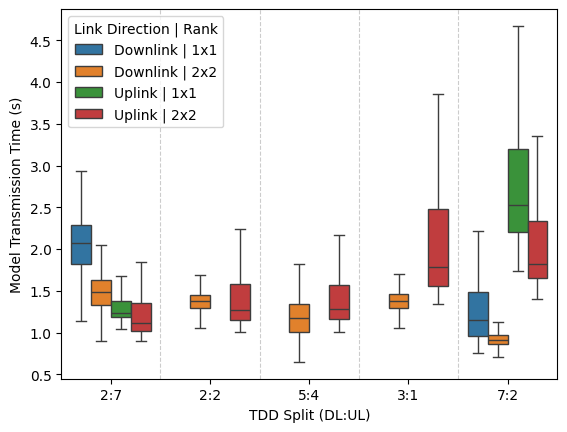

In [95]:
melted = node_dataset_df.melt(id_vars=['tdd','rank'], value_vars=['downlink_latency','uplink_latency'],
                 var_name='direction', value_name='latency')
melted['direction'] = melted['direction'].map({
    'downlink_latency': 'Downlink',
    'uplink_latency': 'Uplink'
})
melted['group'] = melted['direction'] + ' | ' + melted['rank']
ax = sns.boxplot(data=melted, x='tdd', y='latency', hue='group', showfliers=False)
for i in range(1, len(tdd_order)):
    ax.axvline(i - 0.5, ls='--', color='gray', alpha=0.4, lw=0.8)
ax.set_xlabel('TDD Split (DL:UL)')
ax.set_ylabel('Model Transmission Time (s)')
ax.legend(title='Link Direction | Rank')

#### 2x2 MIMO Only

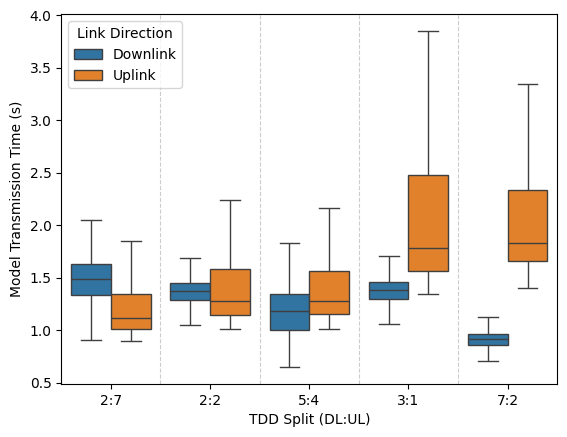

In [96]:
melted_2x2 = melted[melted['rank'] == '2x2']
ax = sns.boxplot(data=melted_2x2, x='tdd', y='latency', hue='direction', showfliers=False)
for i in range(1, len(tdd_order)):
    ax.axvline(i - 0.5, ls='--', color='gray', alpha=0.4, lw=0.8)
ax.set_xlabel('TDD Split (DL:UL)')
ax.set_ylabel('Model Transmission Time (s)')
ax.legend(title='Link Direction')

#### UL/DL Asymmetry

Text(0.5, 1.0, 'Uplink-to-Downlink Asymmetry by TDD Split')

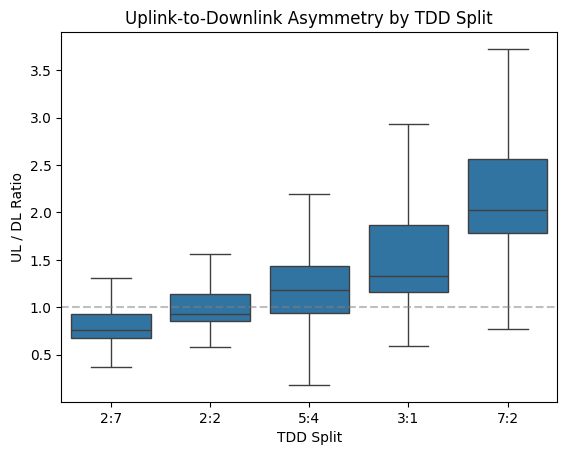

In [106]:
node_dataset_df_2x2 =  node_dataset_df[node_dataset_df['rank'] == '2x2']
node_dataset_df_2x2['ul_dl_ratio'] = node_dataset_df_2x2['uplink_latency'] / node_dataset_df_2x2['downlink_latency']
ax = sns.boxplot(data=node_dataset_df_2x2, x='tdd', y='ul_dl_ratio', showfliers=False)
ax.set_xlabel('TDD Split')
plt.axhline(1, ls='--', color='gray', alpha=0.5)
plt.ylabel('UL / DL Ratio')
plt.title('Uplink-to-Downlink Asymmetry by TDD Split')

Text(0.5, 0, 'TDD Split')

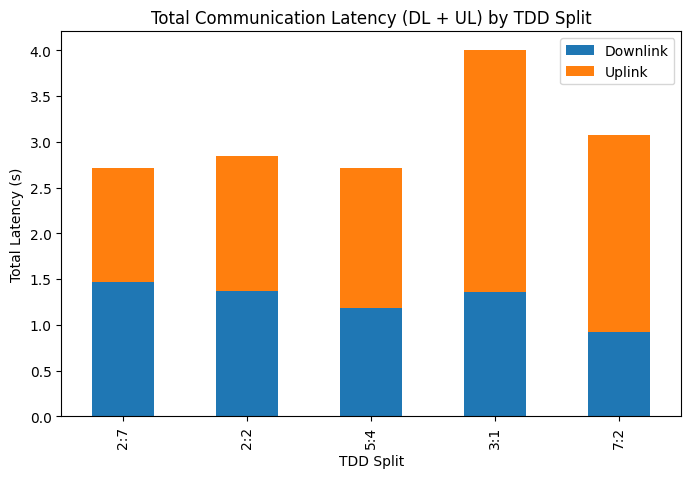

In [107]:
grouped = node_dataset_df_2x2.groupby('tdd')[['downlink_latency','uplink_latency']].mean()
grouped.plot(kind='bar', stacked=True, figsize=(8,5))
plt.legend(['Downlink', 'Uplink'])
plt.ylabel('Total Latency (s)')
plt.title('Total Communication Latency (DL + UL) by TDD Split')
plt.xlabel('TDD Split')

In [116]:
stats = node_dataset_df_2x2.groupby(['tdd', 'rank']).agg(
    dl_median=('downlink_latency', 'median'),
    dl_p95=('downlink_latency', lambda x: x.quantile(0.95)),
    ul_median=('uplink_latency', 'median'),
    ul_p95=('uplink_latency', lambda x: x.quantile(0.95)),
    exec_time=('exec_time', 'median'),
).round(3)

In [ ]:
stats
del node_dataset_df
del node_dataset_df_2x2
del melted
del melted_2x2

In [123]:
df = pd.read_csv('data/all_data_agg.csv')


/var/folders/r3/__lvnrbs1gzctr2qvpy7chrw0000gn/T/ipykernel_7505/2131235795.py:1: DtypeWarning: Columns (0: bandwidth) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/all_data_agg.csv')
